In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

dataset = pd.read_csv("S05-hw-dataset.csv")
dataset.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   client_id                        3000 non-null   int64  
 1    age                             3000 non-null   int64  
 2    income                          3000 non-null   int64  
 3    years_employed                  3000 non-null   int64  
 4    credit_score                    3000 non-null   int64  
 5    debt_to_income                  3000 non-null   float64
 6    num_credit_cards                3000 non-null   int64  
 7    num_late_payments               3000 non-null   int64  
 8    has_mortgage                    3000 non-null   int64  
 9    has_car_loan                    3000 non-null   int64  
 10   savings_balance                 3000 non-null   int64  
 11   checking_balance                3000 non-null   int64  
 12   region_risk_score  

In [77]:
dataset.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [78]:
dataset[" default"].value_counts(normalize=True)

 default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

В датасете 3000 объектов и 17 признаков. Аномальных и пропущенных значений нет. Таргет распределен следующим образом: 0 - 59%, 1 - 41%

In [79]:
X = dataset.loc[:, ' age':' customer_tenure_years']
y = dataset[' default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)
y_baseline_pred = baseline.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_baseline_pred)
baseline_roc_auc = roc_auc_score(y_test, y_baseline_pred)
print("Baseline model:")
print(f"Accuracy: {baseline_accuracy}")
print(f"ROC-AUC: {baseline_roc_auc}")

Baseline model:
Accuracy: 0.59
ROC-AUC: 0.5


Бейзлайн позволяет понять нижнюю границу качества будущей модели. Он дает точку отсчета, чтобы можно было увидеть. что классификатор работает лучше, чем простое присваивание одного класса для любых входных данных. Точка отсчет нужна для того, чтобы понимать, что посторенная модель классификатора имеет смысл. 

In [80]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=1.0, random_state=42))
])

param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"Best C: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)
model_accuracy = accuracy_score(y_test, y_best_pred)
model_roc_auc = roc_auc_score(y_test, y_best_pred)
print(f"Best accuracy: {model_accuracy}")
print(f"Best ROC-AUC: {model_roc_auc}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best C: {'logreg__C': 100.0}
Best accuracy: 0.8016666666666666
Best ROC-AUC: 0.7854140829543889


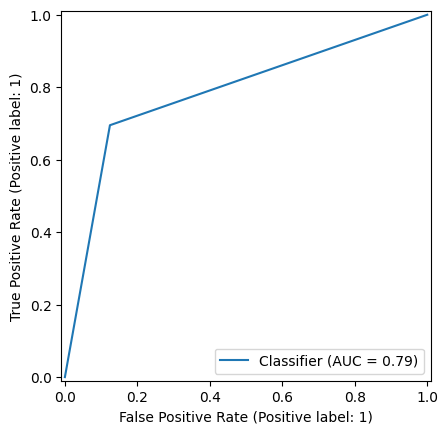

In [81]:
curve = RocCurveDisplay.from_predictions(y_test, y_best_pred)
plt.savefig("figures/roc-curve.png")
plt.show()

In [82]:
print("=== Dummy metrics ===")
print(f"Accuracy: {baseline_accuracy}")
print(f"ROC-AUC: {baseline_roc_auc}\n")

print("=== Logistic Regression metrics ===")
print(f"Accuracy: {model_accuracy}")
print(f"ROC-AUC: {model_roc_auc}")

=== Dummy metrics ===
Accuracy: 0.59
ROC-AUC: 0.5

=== Logistic Regression metrics ===
Accuracy: 0.8016666666666666
ROC-AUC: 0.7854140829543889


Полученная модель логистической регрессии работает лучше, чем бейзлайн. Accuracy выросла с 0.59 до 0.8, ROC-AUC с 0.5 до 0.785.
Для данной задачи лучше всего подходит полученная модель логистической регрессии, так как бейзлайн имеет слишком низкую точность. Реальнаяя модель, в отличие от бейзлайна, использует датасет для обучения, поэтому она гораздо лучше подходит для классификации на реальных данных. 